# Sonic log - Dalbyover 59.459  

Reading LAS wireline log file, calculate sonic velocity from arrival times. 

There are two problems that I didn't solve yet: 

1. Wrong scaling of the entire log. The velocities are about (?) 3 times too high. I also tried to calculate velocities from the distances according to the [factsheet](https://github.com/TobbeTripitaka/Dalbyover/blob/master/Sonic-slimhole_TRGS8068.pdf) of the tool (0.60, 0.80 and 1.00m) and the times in $\mu$s (column 2,3,4 in LAS-file), but the results are exacetly the same as the precalculated velocities (column 5,6,7 in LAS-file). The header of the [LAS files](https://github.com/TobbeTripitaka/Dalbyover/tree/master/data) states that the measurements are in _m_ and _km_ but this might be wrong. 


2. R2R1 and R3R2 don't agree in the upper 40m, the most interesting depths fo us. Can it be related to Cycle Skipping? Can it be a time mute? Or are we simply measuring the mud and water velocities as the velocities in dry chalk are lower. 

To be continued. 

In [78]:
#Plot in document
%matplotlib inline

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def smooth_filter(raw,kernel):
    return signal.medfilt(raw, kernel_size=kernel)

# In files 
in_sonic = ['data/TRGS8068-Dalbyover5.LAS', 'data/TRGS8068-Dalbyover4.LAS']
sonic = np.empty([0, 9])

for file in in_sonic:
    read_data = np.genfromtxt(file, skiprows=38, delimiter=(10,)+(9,)+(14,)*7)
    sonic = np.concatenate((sonic,read_data),axis=0)
 
in_electric = ['data/TCDS3719-Dalbyover1.LAS', 'data/TCDS3719-Dalbyover2.LAS']

for file in in_electric:
    read_data = np.genfromtxt(file, skiprows=34, delimiter=(10,)+(14,)*3)
    
    
# Save file with velocity data
#np.savetxt('data.txt',in_data,fmt='%5.2f') 

# Apply smoothing filter kernel is median window size, must be odd
kernel=71

# Try scaling of velocity. Try e.g. 0.3048, meters to feet.
C = 0.3048

# Calculate a few exemples

sample_depths = [30,10.2,20,100,30]

sample_depths.sort()

for sample in sample_depths:
    depth_index = np.where(in_data[:,0]==sample)
    v1 = 1000*C*0.20/(sonic[depth_index,3]-sonic[depth_index,2]) #R2-R1
    v2 = 1000*C*0.20/(sonic[depth_index,4]-sonic[depth_index,3]) #R3-R2
    print 'v at %.2fm is %f (R2-R1) and %f (R3-R2).' % (sample,v1,v2)

v at 10.20m is 1.446607 (R2-R1) and 0.641684 (R3-R2).
v at 20.00m is 1.394647 (R2-R1) and 0.860288 (R3-R2).
v at 30.00m is 1.350465 (R2-R1) and 0.465841 (R3-R2).
v at 30.00m is 1.350465 (R2-R1) and 0.465841 (R3-R2).
v at 100.00m is 2.962099 (R2-R1) and 2.770909 (R3-R2).


Plots of velocities from R2-R1 and R3-R2. R3-R1 is commented out for clarity. 

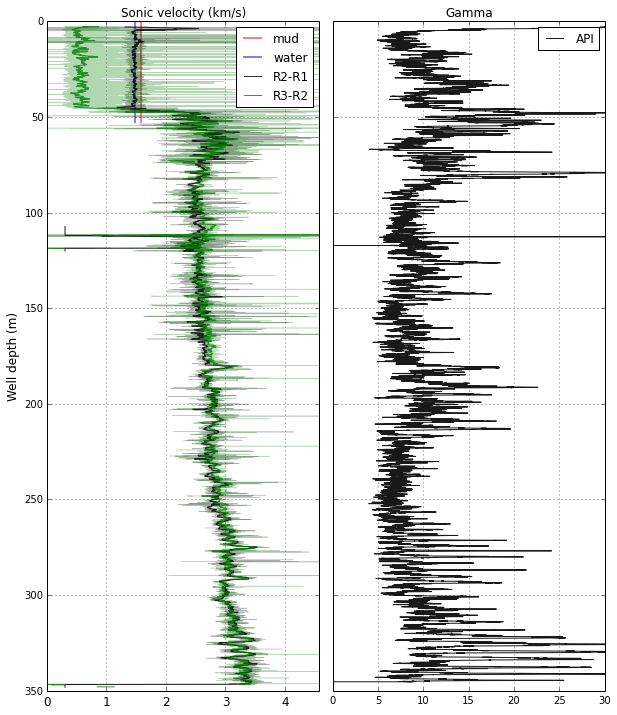

In [99]:
# Plot sonic
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(wspace=0.05)

ax1 = plt.subplot(121)
ax1.set_ylim(ax1.get_ylim()[::-1]) 
plt.title('Sonic velocity (km/s)', fontsize = 12)
plt.ylabel('Well depth (m)', fontsize = 12)

#Plot mud velocity 5,300 feet/s
plt.axvline(x=C*5.188, color='red', label='mud',lw=2,alpha=0.5,ymin=0.85)
plt.axvline(x=1.489, color='blue', label='water',lw=2,alpha=0.5,ymin=0.85)

#Plot raw data
plt.plot(C*sonic[:,5],sonic[:,0]+0.1, lw=0.5, color='black', alpha=0.3)
plt.plot(C*sonic[:,6],sonic[:,0]-0.1, lw=0.5, color='green', alpha=0.3)
#plt.plot(C*in_data[:,7],in_data[:,0], lw=0.5, color='cyan', label='R3-R1', alpha=0.3)

#Plot filtered data
plt.plot(smooth_filter(C*sonic[:,5],kernel),sonic[:,0]+0.1, lw=1, color='black', label='R2-R1', alpha=0.8)
plt.plot(smooth_filter(C*sonic[:,6],kernel),sonic[:,0]-0.1, lw=1, color='green', label='R3-R2', alpha=0.8)
#plt.plot(smooth_filter(C*in_data[:,7],kernel),in_data[:,0], lw=1, color='cyan', label='R3-R1', alpha=0.8)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.xlim(0, 15*C)
plt.grid()
plt.legend()

# Plot gamma
ax2 = plt.subplot(122, sharey=ax1)
plt.title('Gamma', fontsize = 12)
plt.plot(in_data[:,8],in_data[:,0]+0.1, lw=1, color='black', label='API', alpha=0.9)
plt.xlim(0, 30)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.grid()
plt.legend()

plt.show()

Sonic velocities in drill mud is in the range of 185-189 $\mu/ ft$. See [Petrowiki](http://petrowiki.org/Porosity_evaluation_with_acoustic_logging). The lower value is typical for salt mud and showed as a red line in sonic plot. Also velocity for water at about 10 degrees is plotted in blue. 
The velocities for the upper section are very close to these values. As very low velocities are expected in the chalk, the measured signal might actually be from the mud. 